In [31]:
import pandas as pd
from IPython.display import Image, HTML

# April 6 Updates

Deliverables from March 16th:

1. Robust NAICS to ISIC Mapping
2. Weighted Investment Network w/ Matrix Notation
3. Describe Data Limitations
4. VomLehn-Winberry Economic Facts
5. Dosi et al. Economic Facts
6. Lower Priority: Investment EDA

Besides these things we discussed last time, I collected the below data and created readers for them in the data module: 

1. Gini Coefficients (WB)
2. Central Bank Interest Rates (OECD)
3. Capital Reserves (OECD)
4. Corporate Debt Ratios (ES)
5. Corporate Deposit Ratios (ES)
6. General/Central Debt Ratios (ES)
7. Central Bank Equity Ratio (ES)
8. Central Bank Debt Ratio (ES)
9. Government Bond Rates (ES)
10. Dividend Payout Ratio (ES)
11. Central Bank Policy Rates (BIS)

In addition, I used 2022 UK data to approximate firm size distributions by sector: 

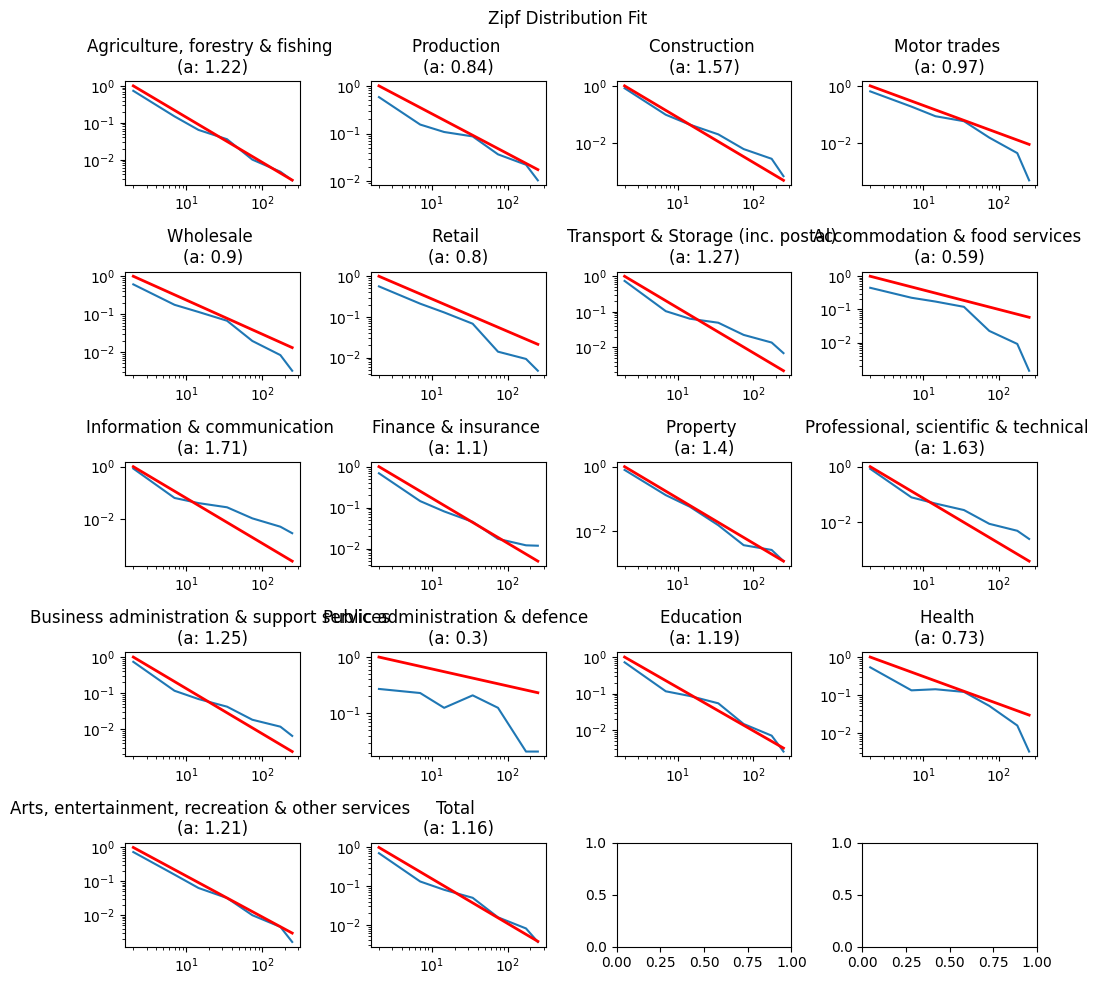

In [32]:
Image("zipf.png", width=800)

## Robust NAICS to ISIC Mapping

Each 6-digit NAICS code is mapped to a 4-digit ISIC code [here](https://unstats.un.org/unsd/classifications/Econ/tables/ISIC/NAICS2012US-ISIC4/NAICS2012US-ISIC4.txt). Each of the 4-digit ISIC codes falls under one of the 21 ISIC sectors found on page 43 [here](https://unstats.un.org/unsd/classifications/Econ/Download/In%20Text/ISIC_Rev_4_publication_English.pdf). Therefore, each 6-digit NAICS code can be mapped to a single ISIC sector. We map 2/3/4-digit NAICS codes to ISIC sectors by mapping them to whichever ISIC sector is mapped to the majority of their underlying 6-digit NAICS codes. When there’s an equal number of underlying 6-digit NAICS codes mapped to multiple sectors, the first sector is arbitrarily chosen (i.e. by ISIC sector alphabetical order). For 3-digit NAICS codes there were only two ties. NAICS 518 (containing ”microfilming services” and  "except microfilming services”) was mapped to ISIC J (Information and communication). NAICS 927 (containing ”transportation of freight using government space vehicles and systems” and ”except space transportation of freight”) was mapped to ISIC O (Public administration and defence; compulsory social security).

An example of the intermediate step that shows the number of subsectors per 4-digit NAICS code. 

In [33]:
pd.read_csv('intermediate_map.csv', index_col=[0,1], header=1).iloc[0:20,0:1]

count
NAICS_4 ISICSec    NaN
1111    A          8.0
1112    A          4.0
1113    A         14.0
1114    A          8.0
1119    A         14.0
        C          1.0
1121    A          4.0
1122    A          1.0
1123    A          6.0
1124    A          2.0
1125    A          6.0
1129    A          7.0
1131    A          1.0
1132    A          2.0
1133    A          2.0
        C          1.0
1141    A          6.0
1142    A          1.0
1151    A          8.0

## Weighted Investment Network w/ Matrix Notation

We use a more comprehensive variant of Vom Lehn-Winberry's (VLW) Investment Matrix with 41 sectors, we aggregate the 41 sectors into the 21 high-level ISIC sectors using the NAICS to ISIC mapping which resulted in a 19x19 matrix, missing public administration (O) and extraterritorial organizations (U). The aggregation sums the rows belonging to a sector of the 41x41 matrix and takes the weighted average of their columns based on the mapping. 

$$I_{19x19}=R_{19x41}V_{41x41}C_{41x19}$$

Where $I_{19x19}$ is our investment matrix, $R_{19x41}$ is a row-summing matrix where $R_{ij}=1$ if VLW's industry $j$ is in ISIC sector $i$ else $R_{ij}=0$. $V_{41x41}$ is VLW's investment matrix. $C_{41x19}$ is a column-averaging matrix where $C_{ji}$ is the total expenditure of VLW's industry $j$ if $j$ is in ISIC sector $i$ else $C_{ji}=0$. $I_{19x19}$ is then normalized column-wise. Therefore, each cell $I_{ii'}$ can be interpreted as the proportion of sector $i'$'s expenditure purchased capital goods from sector $i$.

Below is the unweighted matrix first and the weighted matrix below it.

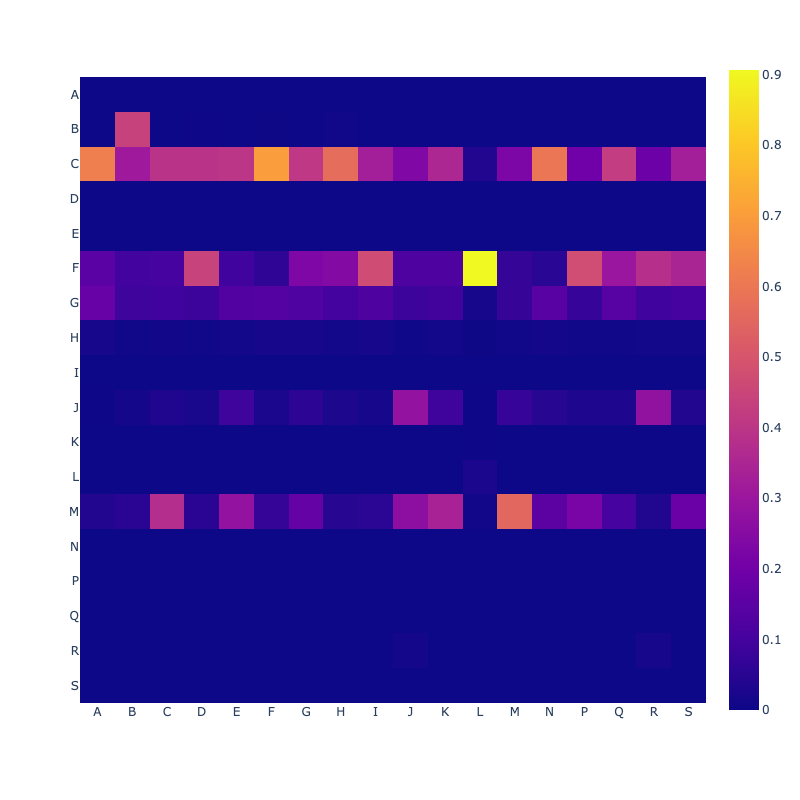

In [34]:
Image('rough_invmat.png', width=500)

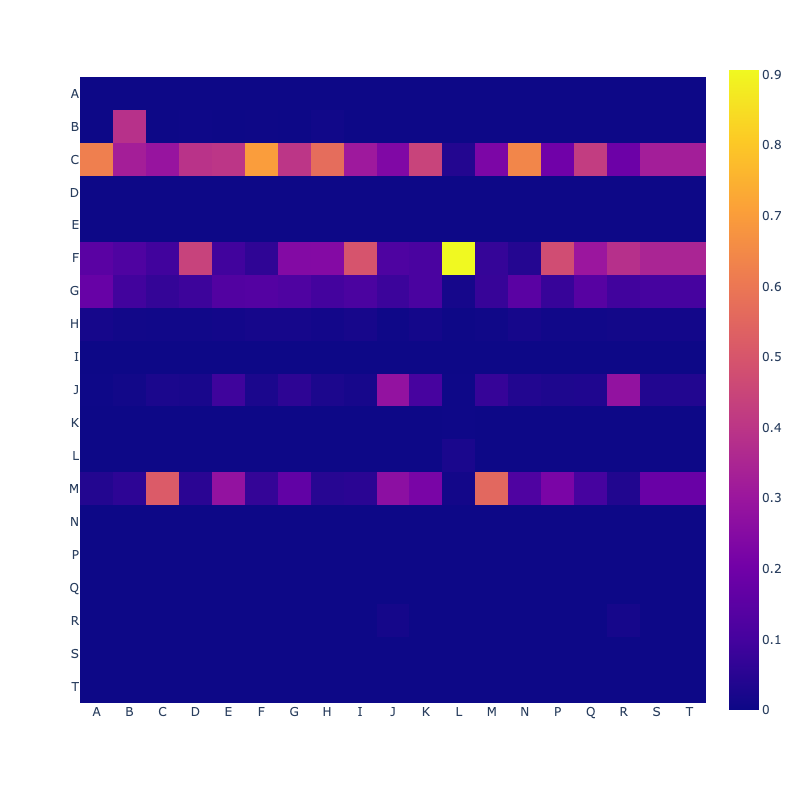

In [35]:
Image('investment_matrix.png', width=500)

## Describe Data Limitations

BEA doesn't seem to have any better data but [Eurostat](https://ec.europa.eu/eurostat/databrowser/view/NAMA_10_NFA_ST__custom_5650422/default/table?lang=en) does, I just need to find a way to map assets to the industries that produce them and I could probably recreate an investment network for all of the countries in the Eurostat data

1. Data before 1997 is much sparser, they use backwards estimates based on 1997-2018 means or interpolation to fill in
2. A few investment hubs are a result of reasonable assumptions, only partly empirically driven

    a. Construction sector produces all non-mining structures

    b. Professional/technical services produce all custom software
    
    c. Artistic originals are only produced by information and communications or art sectors

    d. Information and Communications produce all pre-packaged software

3. Fixed Asset Expenditures are Considered Unreliable by BEA

    a. I tried to find a deeper description of how they collected these numbers but was unable, I've emailed them but no response

    b. Quote from the page: "the more detailed estimates are more likely to be based on judgmental trends, on trends in the higher level aggregate, or on less reliable source data. Fixed cost estimates are provided as part of the detailed data for fixed assets and can be used to measure the real growth rate of the component, but should not be used to analyze shares."


## VomLehn-Winberry Economic Facts

Most of the "facts" that were used to verify this model were specific to the US and its different dynamics before and after 1984. 

1. Hulten's Theory: The effect of sectoral shocks on real GDP is proportional to the sector's domar weight (not a fact but point of comparison to show how imperfect markets and looser assumptions lead to different dynamics) ([Baqaee and Farhi, 2019](https://onlinelibrary.wiley.com/doi/full/10.3982/ecta15202?casa_token=8gutY7JRMEEAAAAA:1sr5DLdelNPlRzkFnCsX8JeUGKC-pdum4Y0XBoeBawVgUDo2BTkFvyavXuT_zWWgdgdLhLl9kx2-3g0),[2020](https://academic.oup.com/qje/article-abstract/135/1/105/5573281), [Bigio and La'O, 2020](https://academic.oup.com/qje/article-abstract/135/4/2187/5838865?redirectedFrom=fulltext))
2. Shocks to household valuation or production of consumption goods don't affect employment but shocks to investment do ([Benhabib et al, 1991](https://www.jstor.org/stable/pdf/2937726.pdf?casa_token=AK2BGYoWVkwAAAAA:BPXZy5aqU9u785Cjycfv22Q9jl9ouelHUUW-I7Dy8awJqZsRLZHf2naTaAN15-G9apES3SXIaa3eXFKkcjkQm5c5wGEI5C_zYgzOk5jAVDh67MEnISg), [Basu et al, 2013](https://www.bde.es/f/webbde/GAP/Secciones/SalaPrensa/Agenda/Eventos/10/May/09.FernaldFinal.pdf))

## Dosi et al. Economic Facts

Since this was an explicit stylized fact model, the authors evaluated its ability to replicate generic empirical phenomena which fits our intended definition of economic "facts". 

I think it would make sense to focus the short-term lit review on ABMs or other stylized models for each of the components of our macro model to see what are the important empirical comparisons, like this paper. However, for the long-term, a lit review focused on a variety of specific scenarios (e.g. Austria facing COVID) that we can replicate would be valuable.

1. Endogenous self-sustained growth with persistent fluctuations and cyclicality ([Napoletano et al, 2006](https://www.rivisteweb.it/doi/10.1427/23296))
2. Firm investment is more volatile than output but consumptions is less volatile ([Stock and Watson, 1999](https://www.sciencedirect.com/science/article/pii/S1574004899010046))
3. Consumption, Investment, Change in Inventories, Employment, and Production are procyclical ([Stock and Watson, 1999](https://www.sciencedirect.com/science/article/pii/S1574004899010046))
4. Prices are countercyclical and leading, inflation is procyclical and lagging, markups are countercyclical ([Stock and Watson, 1999](https://www.sciencedirect.com/science/article/pii/S1574004899010046); [Rotemberg and Woodford, 1999](https://www.sciencedirect.com/science/article/pii/S1574004899100247))
5. The aggregate growth rates of output display fat-tailed distributions ([Castaldi and Dosi, 2009](https://link.springer.com/article/10.1007/s00181-008-0242-x); [Fagiolo et al, 2008](https://onlinelibrary.wiley.com/doi/full/10.1002/jae.1003?casa_token=CVnSKw0TPegAAAAA%3AF37Hux4hcmnuRvNhgo-PI6wwFmz86l-sAIfe0oKFULYoFsqGugwl6VRqxWPnvGqaA02MTuz9ILJ29Q))
6. Cross-section firm (log) size distributions are skewed and not log-normal ([Dosi, 2007](https://ideas.repec.org/a/mul/j0hje1/doi10.1430-27262y2008i2p185-220.html))
7. Pooled firms growth-rate distributions are "tent-shaped" with tails fatter than the Gaussian benchmark ([Botazzi and Secchi, 2006](https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1756-2171.2006.tb00014.x?casa_token=yQSSiwuUB4gAAAAA:Ho24AJ_dkdAykcE4B5c4E01S8HQqsr72j633jUFTZaHUkmIounRrqIzSzY_bSOHIDVo8m5FEcY3a9Q); [2003](https://link.springer.com/content/pdf/10.1023/B:REIO.0000031366.28559.c1.pdf))
8. Productivity growth rates are Laplace distributed and differences persist over time ([Bartelsman and Doms, 2000](https://www.jstor.org/stable/pdf/2565420.pdf?casa_token=BQS49yEpIgEAAAAA:hmuWt786OFkD8DSzoINBDcLj2aMOGNNYaGw4NvPui2sKNAnraiyrfprsB_PwrUaWhqObUE26sfi385d5XqlOthHxEuLs2X8eO8zrii_E8GC74FlG3w); [Dosi, 2007](https://ideas.repec.org/a/mul/j0hje1/doi10.1430-27262y2008i2p185-220.html))
9. Investment lumpiness (I'm not clear on what they meant by this) ([Doms and Dunne, 1998](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=812f7fd6666c09925ebd9e739c721c464eca86c6); [Cabellero, 1999](https://www.nber.org/system/files/working_papers/w6264/w6264.pdf))
10. There are sticky sectoral-level propensities for R&D investment (uncited)
11. Not a fact but important point of comparison: The relative advantage of new (Schumpterian Mark I) versus incumbent firms (Schumpterian Mark II) is an important difference for innovation dynamics where easy of entry and competence of new firms leads to increased long-term growth, mitigates business cycle fluctuations, and reduces unemployment ([Malerba and Orsenigo, 1995](https://watermark.silverchair.com/19-1-47.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAuAwggLcBgkqhkiG9w0BBwagggLNMIICyQIBADCCAsIGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMsLvD2BVxOa9TAdO-AgEQgIICkzdvjvBCeGZxe8eouXRIT9SkJjhq-cjrTO6x2o-HMBf3AAn9Do5zZyjRaqXuQspZJirbo9ZqPdf_5GongblBx5PTFPqo2d8LJoHdY_eWoq99xJCVyyOyyrw9xr8Vlr68FBR8rMnAmakGKj36Mo2HeIVzQqzjlqw3j1MneyXqTiJcNkxaE3ESvFUSh6P38yPHmEyCmYUSLEH8M6vUF5QiIuOFjA22mxgjeBPDtZwF7JigEax3ZCaNhhwW4Azijn3uxXZL6yMlw-zqjztv6HInCQStFLTKPenHJaeOqphm1KCaNErITQ_VsKTwpVU1U088BAHBeV3HLGa-XDZ7_dxSZjVzu8GQfhsE09ryGHvpClWQfvmYpPhhht9A8FuUlZEzn2K0WNQAuoYp2xQ5VqqTvakzjjXOr2tiHqe0ccpndfHrq1meJ77IgdXm7s5FUchCFiDlhf5mNSyQFTMkOiAlJYSjzPw0HhZ9DnVk1avDJJn6UpQ3pVa1qjYFBHoA4Oo8LMxf7o6s5WSlpbCFaSeTHK0C4QzlrI6CMUh8Q6Fmew2vx0Jfuj36fgje1Z3TCmAbpydqyfqBjliVTIHH_Z3FoCrv4odbonE5NLY2BNc8h_J7JMy1e1sTPUk0O-IE-SF3FyjBqvGpIHjZJ53MKxSTv0AT_lRAqQq8RuDN5sUsLjh0ExqDCpcRtL-h_UqGG59osbwXvfOw8s6CKj3nQos0TmI45E9chyMmck--Rqq9DBEpRNrcgI8A_mXw6bPfO1ZJ2WiaWXFS_HtM4UuuFmJ02-ZhXcXuQoNxCdl0O3QM3Pz0ayJvoirC5J7ctK-nTucpWIsBjLmWNYEO9cPttN7gVoyPuWP9JuRau5M48eTB_0Pf7Jhf); [Dosi et al, 1995](https://link.springer.com/content/pdf/10.1007/BF01112463.pdf); [Aghion and Howitt, 2007](https://www.journals.uchicago.edu/doi/pdf/10.1086/ma.22.25554967))

## Lower Priority: Investment EDA

I did not get to this but VomLehn-Winberry have a very limited exploration of changes in the investment network overtime. They found that computer manufacturing and professional/technical services began to supply more nonresidential equipment in the network. Also, intellectual property became increasingly important which boosted the importance of professional/technical services even more so.

## Next Steps?

1. Figure out how to create an investment matrix using the Eurostat data following the approach taken in VomLehn-Winberry
2. Focus a lit review on stylized models of the labor market, financial system, business cycles, etc.
3. Continue adding data and readers to the data processing module
4. Create a tool for viewing and exploring data quality